<a href="https://colab.research.google.com/github/01tusharmgaikwad/price_prediction/blob/main/Untitled10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np


In [4]:
file_path='/content/drive/MyDrive/project/price_data_short.csv'
df = pd.read_csv(file_path)

In [5]:
df.head()

,baseFare,reservationCharge,superfastCharge,fuelAmount,totalConcession,tatkalFare,serviceTax,otherCharge,cateringCharge,dynamicFare,totalFare,availability,trainNumber,timeStamp,fromStnCode,toStnCode,classCode,distance,duration
0,1059,60,0,0.0,0,0,56.0,0,0,0,1175,"[{'date': '2-12-2023', 'status': 'AVAILABLE-00...",11464,2023-10-03 22:13:07.781307,JBP,SRID,1A,54,33.0
1,626,50,0,0.0,0,0,34.0,0,0,0,710,"[{'date': '2-12-2023', 'status': 'AVAILABLE-00...",11464,2023-10-03 22:13:07.781307,JBP,SRID,2A,54,33.0
2,441,40,0,0.0,0,0,24.0,0,0,0,505,"[{'date': '2-12-2023', 'status': 'AVAILABLE-01...",11464,2023-10-03 22:13:07.781307,JBP,SRID,3A,54,33.0
3,125,20,0,0.0,0,0,0.0,0,0,0,145,"[{'date': '2-12-2023', 'status': 'AVAILABLE-00...",11464,2023-10-03 22:13:07.781307,JBP,SRID,SL,54,33.0
4,1059,60,0,0.0,0,0,56.0,0,0,0,1175,"[{'date': '2-12-2023', 'status': 'AVAILABLE-00...",11464,2023-10-03 22:13:07.781307,JBP,KKB,1A,69,49.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326643 entries, 0 to 326642
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   baseFare           326643 non-null  int64  
 1   reservationCharge  326643 non-null  int64  
 2   superfastCharge    326643 non-null  int64  
 3   fuelAmount         326643 non-null  float64
 4   totalConcession    326643 non-null  int64  
 5   tatkalFare         326643 non-null  int64  
 6   serviceTax         326643 non-null  float64
 7   otherCharge        326643 non-null  int64  
 8   cateringCharge     326643 non-null  int64  
 9   dynamicFare        326643 non-null  int64  
 10  totalFare          326643 non-null  int64  
 11  availability       326643 non-null  object 
 12  trainNumber        326643 non-null  int64  
 13  timeStamp          326643 non-null  object 
 14  fromStnCode        326643 non-null  object 
 15  toStnCode          326643 non-null  object 
 16  cl

In [7]:
df.shape

(326643, 19)

In [8]:
df.isnull().sum()

,0
baseFare,0
reservationCharge,0
superfastCharge,0
fuelAmount,0
totalConcession,0
tatkalFare,0
serviceTax,0
otherCharge,0
cateringCharge,0
dynamicFare,0


In [9]:
for columns in df:
    print(columns,":", df[columns].nunique())

baseFare : 1840
reservationCharge : 5
superfastCharge : 5
fuelAmount : 1
totalConcession : 1
tatkalFare : 1
serviceTax : 276
otherCharge : 3
cateringCharge : 69
dynamicFare : 475
totalFare : 976
availability : 27639
trainNumber : 533
timeStamp : 579
fromStnCode : 1480
toStnCode : 1594
classCode : 6
distance : 2759
duration : 2912


In [10]:
# their three columns which has 1 value so they are not get any impact on the data
df2=df.drop(['fuelAmount','totalConcession','tatkalFare'],axis=1)

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326643 entries, 0 to 326642
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   baseFare           326643 non-null  int64  
 1   reservationCharge  326643 non-null  int64  
 2   superfastCharge    326643 non-null  int64  
 3   serviceTax         326643 non-null  float64
 4   otherCharge        326643 non-null  int64  
 5   cateringCharge     326643 non-null  int64  
 6   dynamicFare        326643 non-null  int64  
 7   totalFare          326643 non-null  int64  
 8   availability       326643 non-null  object 
 9   trainNumber        326643 non-null  int64  
 10  timeStamp          326643 non-null  object 
 11  fromStnCode        326643 non-null  object 
 12  toStnCode          326643 non-null  object 
 13  classCode          326643 non-null  object 
 14  distance           326643 non-null  int64  
 15  duration           326643 non-null  float64
dtypes:

In [12]:
df2.shape

(326643, 16)

In [13]:
df2.dtypes

,0
baseFare,int64
reservationCharge,int64
superfastCharge,int64
serviceTax,float64
otherCharge,int64
cateringCharge,int64
dynamicFare,int64
totalFare,int64
availability,object
trainNumber,int64


In [14]:
print(df2['otherCharge'].unique())
print(df2['reservationCharge'].unique())
print(df2['superfastCharge'].unique())
print(df2['classCode'].unique())

[ 0 25 15]
[60 50 40 20 15]
[ 0 45 30 15 75]
['1A' '2A' '3A' 'SL' '2S' 'CC']


In [15]:
df2.drop_duplicates(inplace=True)

In [16]:
df2.shape

(326643, 16)

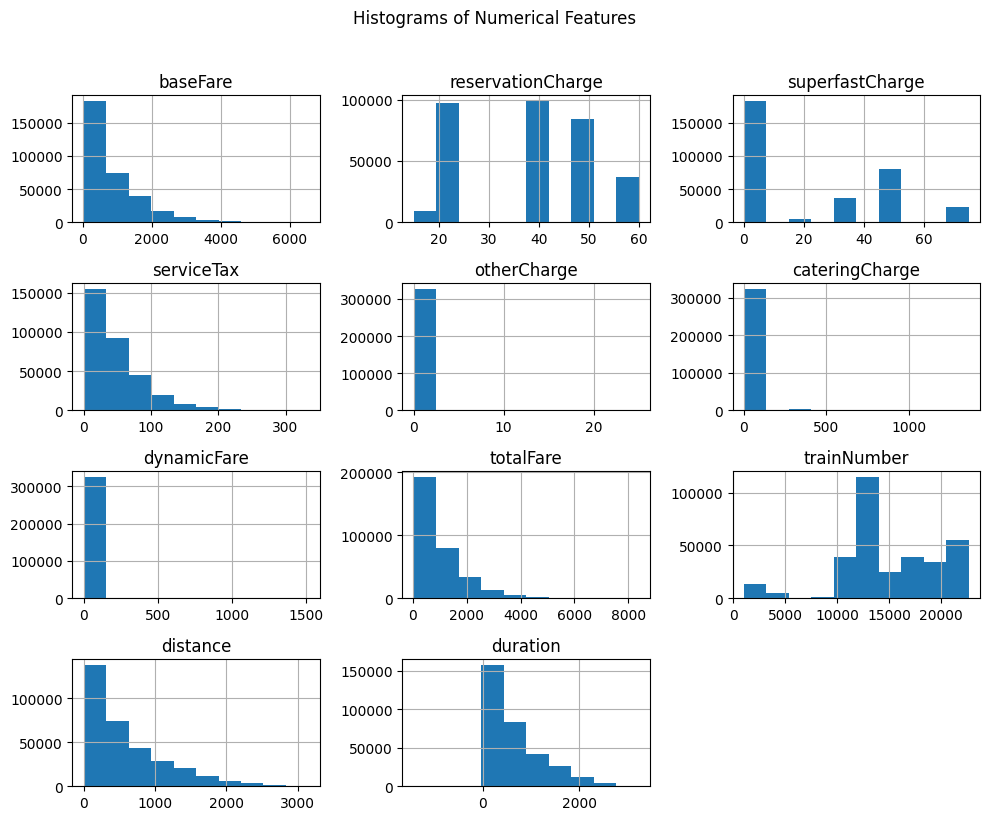

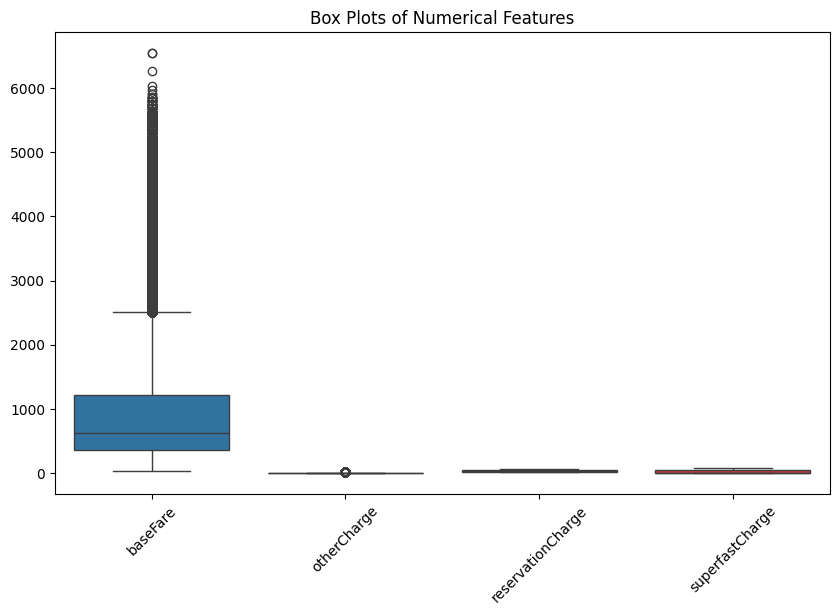

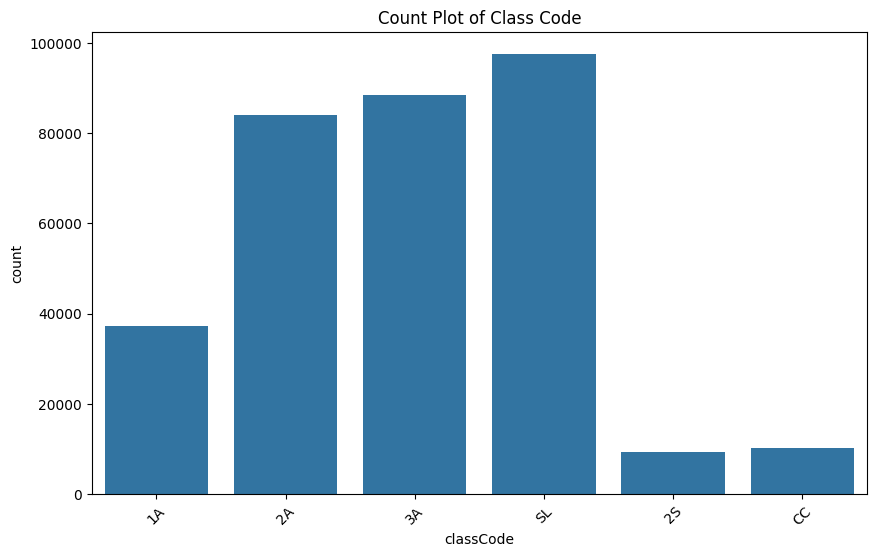

In [29]:


import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical columns
df2.hist(figsize=(10, 8))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

# Box plots for numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2[['baseFare', 'otherCharge', 'reservationCharge', 'superfastCharge']])
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

# Count plots for categorical columns
plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='classCode')
plt.title('Count Plot of Class Code')
plt.xticks(rotation=45)
plt.show()




# one hot encoding
- price is depends on the classcode so we make sepearte columns of the classcode categorical column  

In [17]:
df_ohe = pd.get_dummies(df['classCode'])

In [18]:
df_ohe.shape


(326643, 6)

In [19]:
df_ohe.head()

,1A,2A,2S,3A,CC,SL
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,True,False,False
3,False,False,False,False,False,True
4,True,False,False,False,False,False


In [20]:
df_now = df[['classCode', 'distance', 'duration']]
y = df2['baseFare']

In [21]:
merged = pd.concat([df_now,df_ohe ], axis=1)
x = merged.drop(['classCode'], axis=1)

In [22]:
x.head()

,distance,duration,1A,2A,2S,3A,CC,SL
0,54,33.0,True,False,False,False,False,False
1,54,33.0,False,True,False,False,False,False
2,54,33.0,False,False,False,True,False,False
3,54,33.0,False,False,False,False,False,True
4,69,49.0,True,False,False,False,False,False


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,
                                                 random_state=7)

In [24]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((228650, 8), (97993, 8), (228650,), (97993,))

In [25]:
# prompt: apply all regression models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_preds = lr_model.predict(x_test)
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, lr_preds))
print("R-squared:", r2_score(y_test, lr_preds))

# Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
dt_preds = dt_model.predict(x_test)
print("\nDecision Tree Regression:")
print("MSE:", mean_squared_error(y_test, dt_preds))
print("R-squared:", r2_score(y_test, dt_preds))

# Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
rf_preds = rf_model.predict(x_test)
print("\nRandom Forest Regression:")
print("MSE:", mean_squared_error(y_test, rf_preds))
print("R-squared:", r2_score(y_test, rf_preds))

# # Support Vector Regression
# svr_model = SVR()
# svr_model.fit(x_train, y_train)
# svr_preds = svr_model.predict(x_test)
# print("\nSupport Vector Regression:")
# print("MSE:", mean_squared_error(y_test, svr_preds))
# print("R-squared:", r2_score(y_test, svr_preds))

# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor()
knn_model.fit(x_train, y_train)
knn_preds = knn_model.predict(x_test)
print("\nK-Nearest Neighbors Regression:")
print("MSE:", mean_squared_error(y_test, knn_preds))
print("R-squared:", r2_score(y_test, knn_preds))


Linear Regression:
MSE: 93335.89235465175
R-squared: 0.8509776751748395

Decision Tree Regression:
MSE: 26214.492945644142
R-squared: 0.9581453116875036

Random Forest Regression:
MSE: 16087.870581662677
R-squared: 0.9743137198875649

K-Nearest Neighbors Regression:
MSE: 332947.73286949063
R-squared: 0.4684076624140706


In [26]:
# prompt: apply lasso and ridge model on the data and give accuracy as well

from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)
ridge_preds = ridge_model.predict(x_test)
print("\nRidge Regression:")
print("MSE:", mean_squared_error(y_test, ridge_preds))
print("R-squared:", r2_score(y_test, ridge_preds))

# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)
lasso_preds = lasso_model.predict(x_test)
print("\nLasso Regression:")
print("MSE:", mean_squared_error(y_test, lasso_preds))
print("R-squared:", r2_score(y_test, lasso_preds))



Ridge Regression:
MSE: 93335.81852658538
R-squared: 0.8509777930505014

Lasso Regression:
MSE: 93417.45980222187
R-squared: 0.8508474426312778


In [27]:
# prompt: apply gradient boosting

from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train, y_train)
gb_preds = gb_model.predict(x_test)
print("\nGradient Boosting Regression:")
print("MSE:", mean_squared_error(y_test, gb_preds))
print("R-squared:", r2_score(y_test, gb_preds))



Gradient Boosting Regression:
MSE: 15275.475133925722
R-squared: 0.9756108099484722
